In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.table import Table
import numpy as np
from matplotlib.colors import SymLogNorm
import stuff

from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preprocessing
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

keras.backend.set_image_data_format('channels_first')

In [2]:
catalog = Table.read('/home/aalvarez/Work/Data/sim14/sim14_cat.fits', hdu=1)
catalog['vignet'][np.isnan(catalog['vignet'])] = 0.
snr = ((catalog['isophotal_flux'] / catalog['isophotal_flux_err']) >= 10) & (catalog['auto_flags'] == 0)
catalog = catalog[snr]

In [3]:
sim = stuff.Simulation('/home/aalvarez/Work/Data/sim14/sim14.list', mag_zeropoint=26, exposure=300)

In [4]:
closest = sim.get_closest(catalog['world_centroid_alpha'], catalog['world_centroid_delta'])

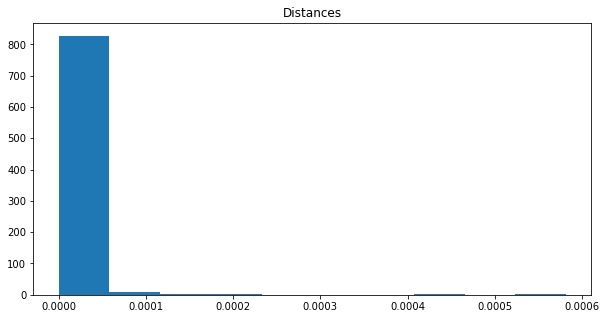

In [5]:
plt.figure(figsize=(10,5))
plt.hist(closest.distance)
plt.title('Distances')
plt.show()

In [7]:
match = (catalog['ch.unige.astro.IsGalaxy.is_galaxy'] == closest.is_galaxy)
print(match.sum() / len(match))

0.7693222354340071


In [8]:
catalog['ch.unige.astro.IsGalaxy.is_galaxy']

0
1
1
1
1
1
1
1
1
1
1


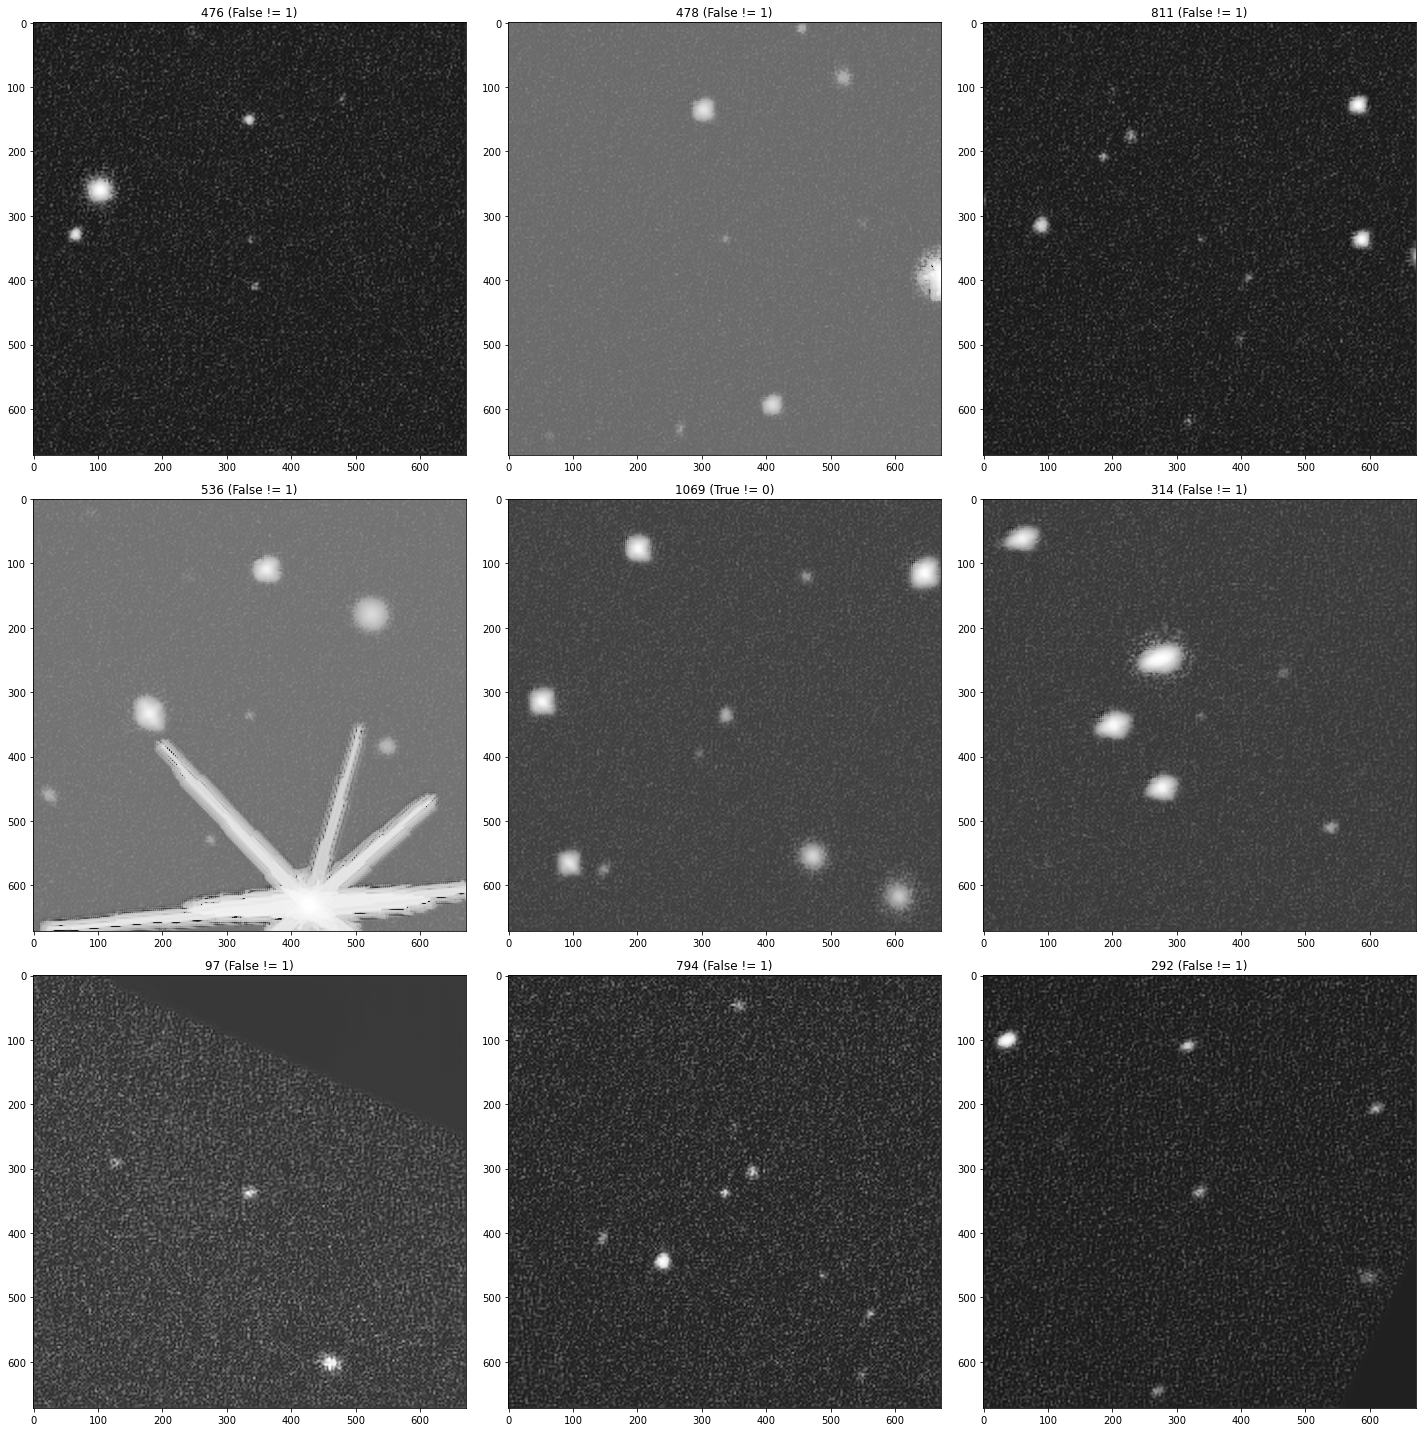

In [16]:
mismatches = catalog[~match]
mismatches_is_gal = closest.is_galaxy[~match]
idx = np.arange(len(mismatches))
np.random.shuffle(idx)

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(20, 20))
for i, ax in zip(idx, axes.ravel()):
    ax.set_title('{} ({} != {})'.format(mismatches['source_id'][i], mismatches_is_gal[i], mismatches['ch.unige.astro.IsGalaxy.is_galaxy'][i]))
    ax.imshow(mismatches['torch-jit-export.output'][i, 0], cmap='Greys_r', norm=SymLogNorm(10, base=10))
plt.tight_layout()